                IMPORTING LIBRARIES REQUIRED FOR THE PROJECT

In [5]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns

                      DATA SCIENCE & PROCESSING   

In [51]:
data = pd.read_csv('heart_disease_uci.csv')


In [7]:
data.isnull().sum()

id            0
age           0
sex           0
dataset       0
cp            0
trestbps     59
chol         30
fbs          90
restecg       2
thalch       55
exang        55
oldpeak      62
slope       309
ca          611
thal        486
num           0
dtype: int64

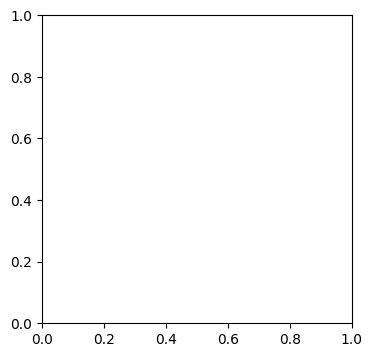

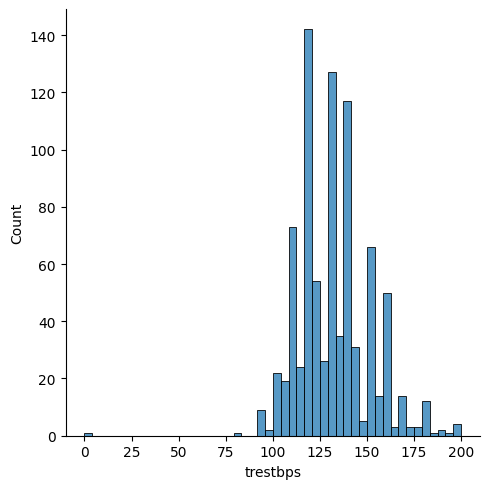

In [16]:
# Analysing the missing NaN values & fixing them using Central Dependencies/Imputation.
# Firstly, we'll do trestbps :

fig, ax = plt.subplots(figsize=(4,4))
sns.displot(data.trestbps)

In [21]:
data['trestbps'].fillna(data['trestbps'].median(),inplace=True)

data.isnull().sum()

id            0
age           0
sex           0
dataset       0
cp            0
trestbps      0
chol         30
fbs          90
restecg       2
thalch       55
exang        55
oldpeak      62
slope       309
ca          611
thal        486
num           0
dtype: int64

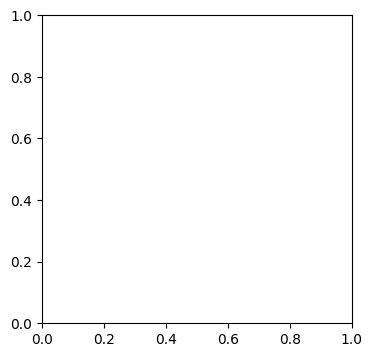

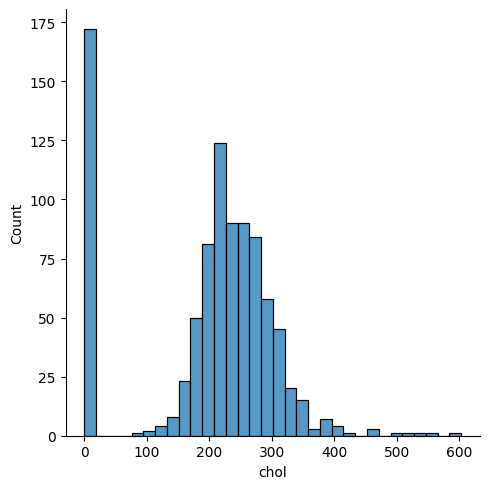

In [22]:
# Now we do Chol :
fig, ax = plt.subplots(figsize=(4,4))
sns.displot(data.chol)

In [29]:
data['chol'].fillna(data['chol'].median(),inplace=True)
data.isnull().sum()

id            0
age           0
sex           0
dataset       0
cp            0
trestbps      0
chol          0
fbs          90
restecg       2
thalch       55
exang        55
oldpeak      62
slope       309
ca          611
thal        486
num           0
dtype: int64

<__array_function__ internals>:180: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.


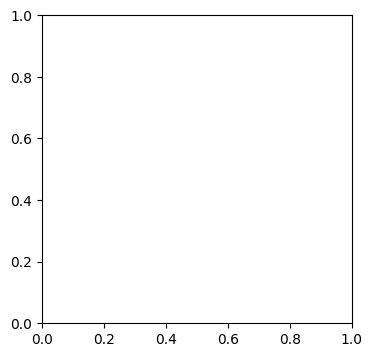

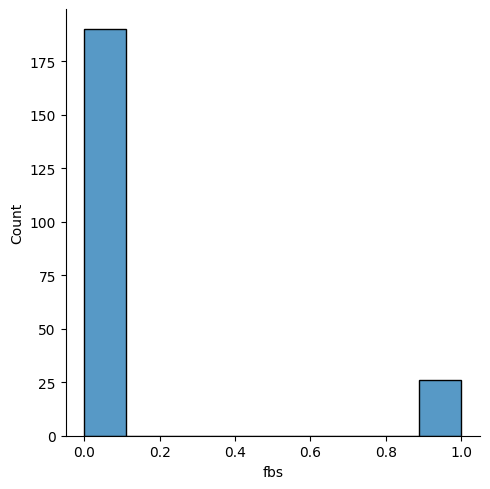

In [23]:
# Now we do fbs :
fig, ax = plt.subplots(figsize=(4,4))
sns.displot(data.fbs)

In [36]:
data['fbs'].fillna(data['fbs'].median(),inplace=True)
data.isnull().sum()

id            0
age           0
sex           0
dataset       0
cp            0
trestbps      0
chol          0
fbs           0
restecg       2
thalch       55
exang        55
oldpeak      62
slope       309
ca          611
thal        486
num           0
dtype: int64

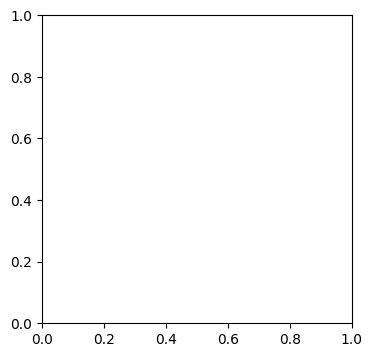

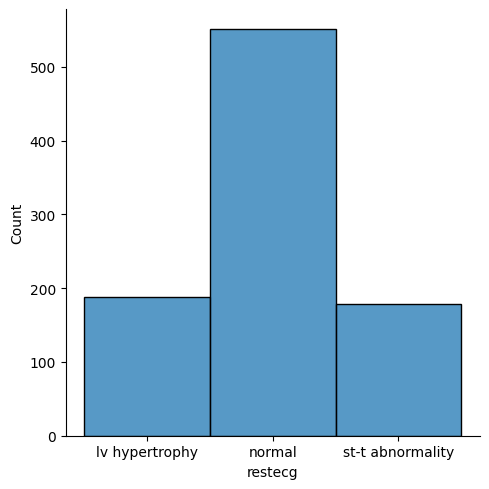

In [37]:
# Now we do restecg :
fig, ax = plt.subplots(figsize=(4,4))
sns.displot(data.restecg)

In [11]:
data = data.dropna(how = 'any')
data.isnull().sum()

id          0
age         0
sex         0
dataset     0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalch      0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
num         0
dtype: int64

In [52]:
data['sex'] = data['sex'].map({'Male': 1, 'Female': 0})

In [53]:
data.describe()

,id,age,sex,trestbps,chol,thalch,oldpeak,ca,num
count,920.000000,920.000000,920.000000,861.000000,890.000000,865.000000,858.000000,309.000000,920.000000
mean,460.500000,53.510870,0.789130,132.132404,199.130337,137.545665,0.878788,0.676375,0.995652
std,265.725422,9.424685,0.408148,19.066070,110.780810,25.926276,1.091226,0.935653,1.142693
min,1.000000,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000,0.000000
25%,230.750000,47.000000,1.000000,120.000000,175.000000,120.000000,0.000000,0.000000,0.000000
50%,460.500000,54.000000,1.000000,130.000000,223.000000,140.000000,0.500000,0.000000,1.000000
75%,690.250000,60.000000,1.000000,140.000000,268.000000,157.000000,1.500000,1.000000,2.000000
max,920.000000,77.000000,1.000000,200.000000,603.000000,202.000000,6.200000,3.000000,4.000000


In [54]:
data.drop(data[data['num'] >= 2].index, inplace = True)
data.drop(data[data['num'] >= 3].index, inplace = True)
data.drop(data[data['num'] >= 4].index, inplace = True)


In [55]:
data.describe()
data['num'].value_counts()

0    411
1    265
Name: num, dtype: int64

                                         MACHINE TRANING PROCESSES 

In [56]:
X = data.drop(columns='num', axis=1)
Y = data['num']
print(Y)

0      0
2      1
3      0
4      0
5      0
      ..
913    1
915    1
916    0
918    0
919    1
Name: num, Length: 676, dtype: int64


In [57]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, stratify=Y, random_state=2)

In [68]:
print(X.shape, X_train.shape, X_test.shape)

(676, 15) (540, 15) (136, 15)
